<a href="https://colab.research.google.com/github/elygoner/SSN/blob/main/Exercici_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using 135 grid points.
Calculating matrix...
Diagonalizing...
RESULTS:
State  0 : Energy = -0.0000 , Kinetic = -3.5431, Tunneling prob = 3.5431
State  1 : Energy = -0.0000 , Kinetic = -3.8136, Tunneling prob = 3.8136
State  2 : Energy = 19.9034 , Kinetic = 6.1003, Tunneling prob = 13.8031
Plotting


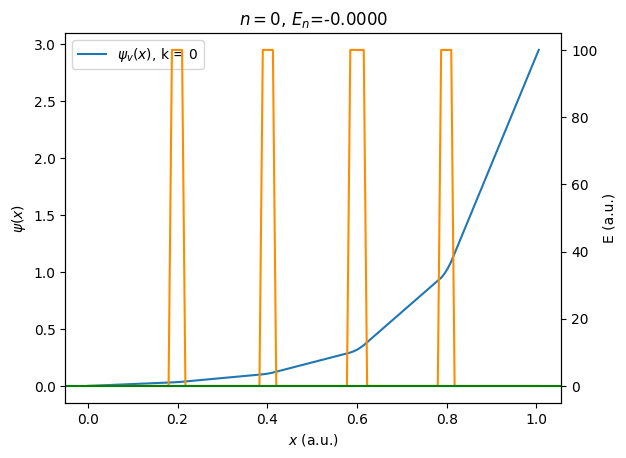

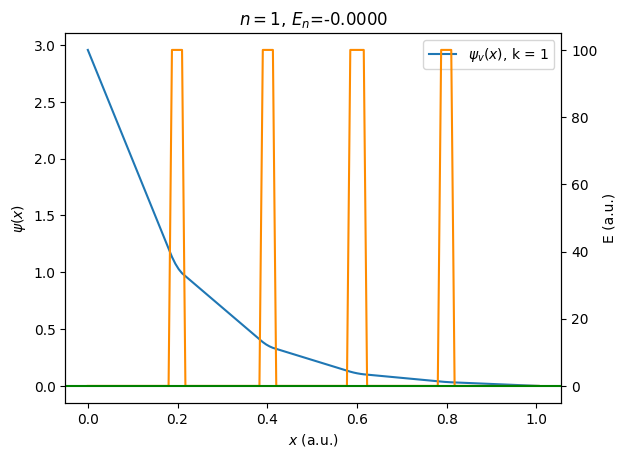

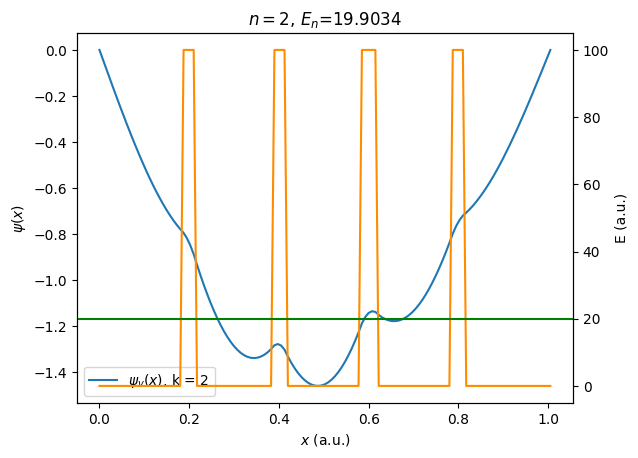

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def getV(x):
  ############################Canvio la condició per crear les barreres
  #i poso La V a 100 degut a les condicions de l'apartat resolt
    if ((x>=.185 and x<=.215) or (x>=.385 and x<=.415) or (x>=.585 and x<=.615) or (x>=.785 and x<=.815)):
       potvalue = 100
  ############################
    else:
       potvalue = 0.0
    return potvalue

#################################### Programa de derivades numèricas
def derivative(psi, x, N):
    der = np.zeros((N+1, len(psi)))
    der[0, :] = psi
    for n in range(1, N+1):
        dy = np.diff(der[n-1, :])
        dx = np.diff(x)
        diff = dy / dx
        der[n, 0] = diff[0]
        der[n, -1] = diff[-1]
        der[n, 1:-1] = 0.5 * (diff[:-1] + diff[1:])
    return der
###################################

def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(1,n-1):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F

##################### Condicions del problema
L = 1
xlower = 0
xupper = 1
#####################

h = 0.0075

x = np.arange(xlower,xupper+h,h)
npoints=len(x)

print("Using",npoints, "grid points.")

print("Calculating matrix...")
F=Eq(npoints,h,x)

print("Diagonalizing...")
eigenValues, eigenVectors = np.linalg.eig(F)

idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

E = - w/(2.0*h**2)

psi = [None]*npoints
prob=np.zeros(np.shape(psi))

for k in range(0,len(w)):
  psi[k] = vs[:,k]
  integral = h*np.dot(psi[k],psi[k])
  psi[k] = psi[k]/integral**0.5

print("RESULTS:")

for k in range(0,3):
  Erel=E[k]/2.0
  #############################La integral de K, calcul de V i canvi en l'expresio dels valors
  K=-h*np.dot(psi[k],derivative(psi[k],x,2)[2,:])*0.5
  V=E[k]-K
  print("State ",k,": Energy = %.4f" %E[k],f', Kinetic = {K:.4f}, Tunneling prob = {V:.4f}'.format(Erel))
  #############################
print("Plotting")

V=np.zeros(npoints)
for i in range(0,npoints):
	V[i]=getV(x[i])

for v in range(0,3):
  plt.plot(x,psi[v],label=r'$\psi_v(x)$, k = ' + str(v))
  plt.title(r'$n=$'+ str(v) + r', $E_n$=' + '{:.4f}'.format(E[v]))
  plt.legend()
  plt.xlabel(r'$x$ (a.u.)')
  plt.ylabel(r'$\psi(x)$')
  #############################Afeigeixo aixó al plot com a guia per veure a on i quina forma te el potencial i a quines energies
  plt2=plt.twinx()
  plt2.set_ylabel('E (a.u.)')
  plt2.plot(x,V,c='darkorange',label=r'V values')
  plt2.axhline(y=E[v], color='g')
  #############################
  plt.show()


Tunneling prob = 0.7166
Tunneling prob = -0.0879
Tunneling prob = -0.2501
Tunneling prob = 1.2555
Tunneling prob = -0.3608
Tunneling prob = -0.5140
Tunneling prob = 0.2220
Tunneling prob = -0.7828
Tunneling prob = -0.3690
Tunneling prob = -0.5361
Tunneling prob = -0.3883
Tunneling prob = -0.1882
Tunneling prob = 0.1004
Tunneling prob = -0.0544
Tunneling prob = -0.5402
Tunneling prob = -0.8722
Tunneling prob = -0.1115
Tunneling prob = -0.8953
Tunneling prob = -0.4254
Tunneling prob = -0.1896
Tunneling prob = -0.4717
Tunneling prob = -0.3975
Tunneling prob = 0.3695
Tunneling prob = 0.0191
Tunneling prob = 0.1320
Tunneling prob = -0.1367
Tunneling prob = 0.0680
Tunneling prob = 0.2159
Tunneling prob = -0.1471
Tunneling prob = -0.6001
Tunneling prob = -0.1791
Tunneling prob = -0.1852
Tunneling prob = -0.4097
Tunneling prob = -0.3520
Tunneling prob = -0.6272
Tunneling prob = -0.2748
Tunneling prob = -0.5928
Tunneling prob = 0.2847
Tunneling prob = -0.0366
Tunneling prob = -0.5342
Tunneling 

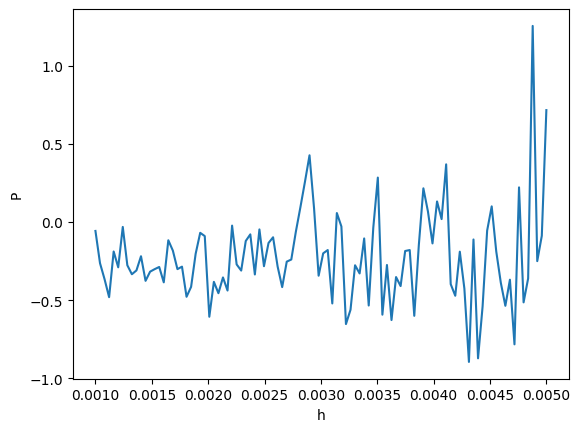

In [58]:
H=np.linspace(0.005,0.001,100)
P=np.zeros(len(H))
n=0
for h in H:

##################### Condicions del problema
  L = 1
  xlower = 0
  xupper = 1
#####################

  x = np.arange(xlower,xupper+h,h)
  npoints=len(x)


  F=Eq(npoints,h,x)


  eigenValues, eigenVectors = np.linalg.eig(F)

  idx = eigenValues.argsort()[::-1]
  w = eigenValues[idx]
  vs = eigenVectors[:,idx]

  E = - w/(2.0*h**2)

  psi = [None]*npoints
  prob=np.zeros(np.shape(psi))

  for k in range(0,len(w)):
    psi[k] = vs[:,k]
    integral = h*np.dot(psi[k],psi[k])
    psi[k] = psi[k]/integral**0.5



  Erel=E[3]/2.0
#############################La integral de K, calcul de V i canvi en l'expresio dels valors
  K=-h*np.dot(psi[3],derivative(psi[3],x,2)[2,:])*0.5
  V=E[3]-K
  print(f'Tunneling prob = {V-12.924:.4f}'.format(Erel))
  P[n]=V-12.924
  n+=1
#############################
plt.plot(H,P)
plt.xlabel('h')
plt.ylabel('P')
plt.show()
